In [5]:
"""
Vizualizate the categorized info and statistics in pdf reports

@author: Eduardo Santos, Alberto de Obeso
date: july 2020
"""

# load dependencies
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pytesseract as pt
from pytesseract import Output
import nltk
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [6]:
# Define the image file
image_file = '1-5-18 GH Loss Runs.jpg'
image_path = os.path.join('.','data','images','') + image_file

# read image as unsigned integer at 8 bits
image_base = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread(image_path)
# vizualizate the data
#plt.figure(figsize=(30,23)), plt.imshow(image_base, cmap= 'gray'), plt.show() 

# extract words
word_list = pt.image_to_string(image_base)
word_dict = pt.image_to_data(image_base, output_type=Output.DICT)

In [84]:
## scatter the x, y  and size values for every pfd file 
# important: files must be in dict format for this
# this is just an informative code for experiments

## Extract data 

import os
import ast
# get all the files 

# path to txt files
relative_folder_path = os.path.join('.','data','txt','')

# list txt files 
text_files = os.listdir(relative_folder_path)


# create the vectors
x_insured, y_insured, z_insured = [], [], []
x_dated, y_dated, z_dated = [], [], []
x_policy, y_policy, z_policy = [], [], []

# for each file examinate if the interest words are available
for i in text_files:

    # read txt 
    text_file = open(relative_folder_path + i, "r")
    txt_raw = text_file.read()
    txt_dict = ast.literal_eval(txt_raw)
    text_file.close()
 
    # if words of interest is in file
    for j in range(len(txt_dict['text'])):

        # check every sentences for insured token position
        if "INSURED" in txt_dict['text'][j].upper():
            x_insured.append(txt_dict['left'][j])
            y_insured.append(txt_dict['top'][j])
            z_insured.append(txt_dict['left'][j] + txt_dict['height'][j])

        if "DATE" in txt_dict['text'][j].upper():
            x_dated.append(txt_dict['left'][j])
            y_dated.append(txt_dict['top'][j])
            z_dated.append(txt_dict['left'][j] + txt_dict['height'][j])

        if "POLICY" in txt_dict['text'][j].upper():
            x_policy.append(txt_dict['left'][j])
            y_policy.append(txt_dict['top'][j])
            z_policy.append(txt_dict['left'][j] + txt_dict['height'][j])
# get the index 

# add the coordinates and size to the respective vector

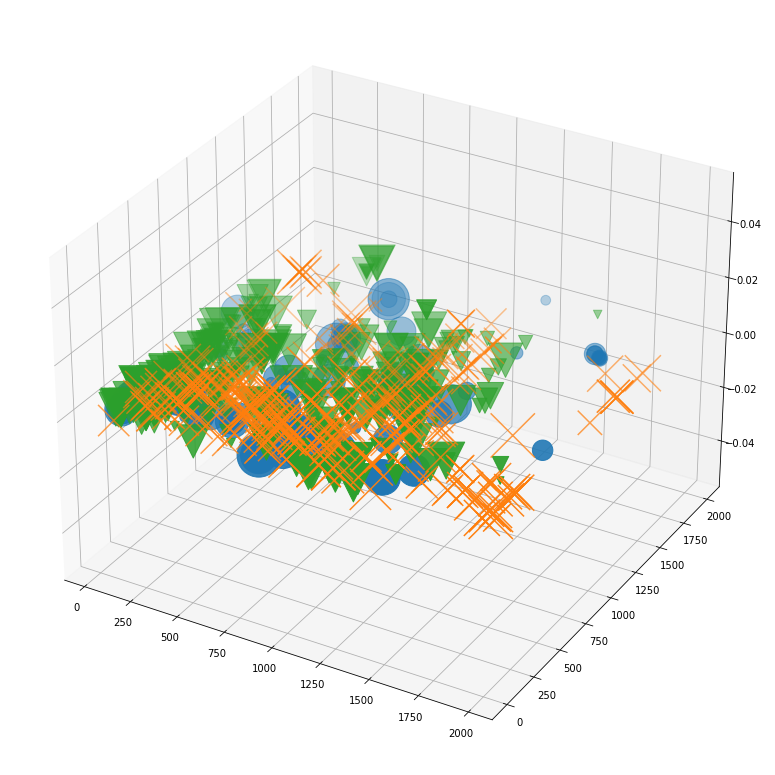

In [93]:
## plot 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(17,14))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x_insured,y_insured,z_insured, marker = 'o')
plt.scatter(x_dated,y_dated,z_dated,marker = 'x')
plt.scatter(x_policy,y_policy,z_policy,marker = 'v')
plt.show()


In [4]:
## Draw images 

# label words 
categorized =nlp(str(word_dict['text']))

# tokenize words list
tokenized_text = ([(word.text, word.label_) for word in categorized.ents])
# categories
names, money, dates = [], [], []

# search for matches in categories
for i in range(len(tokenized_text)):
    # 
    if 'PERSON' in tokenized_text[i]:
        names.append(tokenized_text[i][0])
    #    
    if 'MONEY' in tokenized_text[i]:
        money.append(tokenized_text[i][0])
    #    
    if 'DATE' in tokenized_text[i]:
        dates.append(tokenized_text[i][0])


In [6]:
# comme filter 

def create_box_of_interest(dictionary)
_f_list = [word_dict['text'][i].replace(',','') for i in range(len(word_dict['text']))]


for i in range(len(names)):
     x_1 = word_dict['left'][_f_list.index(names[i])]
     y_1 = word_dict['top'][_f_list.index(names[i])]
     x_2 = word_dict['width'][_f_list.index(names[i])]
     y_2 = word_dict['height'][_f_list.index(names[i])]
     image_color = cv2.rectangle(image_color, (x_1, y_1), (x_1 + x_2, y_1 + y_2), (255, 0, 0), 2)